In [1]:
import torch

#### Dtypes , types

In [7]:
a = torch.tensor([0,1,2,3,4])
print(a.dtype)

torch.int64


In [4]:
print(a.type())

torch.LongTensor


In [8]:
b = torch.tensor([0.0,1.0,2.0,3.0,4.0])

In [9]:
print(b.dtype,b.type())

torch.float32 torch.FloatTensor


In [12]:
c = torch.FloatTensor([0,2,3])
print(c.dtype,c.type())

torch.float32 torch.FloatTensor


#### Changing tensor shape

In [14]:
d = torch.tensor([[0,1,2]])
e = torch.tensor([0,1,2])
f = torch.tensor([[0,1,2],[1,2,3]])
d.shape,e.shape,f.shape

(torch.Size([1, 3]), torch.Size([3]), torch.Size([2, 3]))

In [20]:
e2 = e.view(1,3) # add a dimension
print(e2.shape)
e3 = e.view(-1,3)
print(e3.shape)
e4 = e.view(-1,1)
print(e4.shape)

torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([3, 1])


#### From numpy

In [22]:
import numpy as np
npa = np.ones(4)

In [25]:
tt = torch.from_numpy(npa)
print(tt)
print(tt.shape)

tensor([1., 1., 1., 1.], dtype=torch.float64)
torch.Size([4])


#### to numpy

In [26]:
npa2 = tt.numpy()

In [27]:
npa2

array([1., 1., 1., 1.])

#### Vector addition and substraction

In [30]:
t1 = torch.from_numpy(np.ones(5))
t2 = torch.from_numpy(np.ones(5)*2)
print(t1,t2)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64) tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [31]:
t3 = t1+t2
print(t3)

tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


#### Product of 2 vectors

In [32]:
t1*t2

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

#### Dot Product

In [33]:
torch.dot(t1,t2)

tensor(10., dtype=torch.float64)

In [34]:
# or
torch.sum(t1*t2)

tensor(10., dtype=torch.float64)

#### universal functions

In [36]:
torch.mean(t1)

tensor(1., dtype=torch.float64)

In [37]:
torch.std(t1)

tensor(0., dtype=torch.float64)

In [38]:
torch.median(t1)

tensor(1., dtype=torch.float64)

In [39]:
torch.max(t1)

tensor(1., dtype=torch.float64)

In [40]:
torch.min(t1)

tensor(1., dtype=torch.float64)

In [42]:
torch.sin(t1)

tensor([0.8415, 0.8415, 0.8415, 0.8415, 0.8415], dtype=torch.float64)

#### 2D

In [44]:
a = torch.tensor([[0,1,2,3],[4,5,6,7]])
b = torch.tensor([[0,4,6,9],[4,5,6,7]])

In [52]:
a.size(),a.shape

(torch.Size([2, 4]), torch.Size([2, 4]))

In [54]:
a[0][1]

tensor(1)

In [55]:
a[0][:]

tensor([0, 1, 2, 3])

In [56]:
a+b

tensor([[ 0,  5,  8, 12],
        [ 8, 10, 12, 14]])

In [57]:
a*b

tensor([[ 0,  4, 12, 27],
        [16, 25, 36, 49]])

In [59]:
a.shape,b.shape

(torch.Size([2, 4]), torch.Size([2, 4]))

In [63]:
torch.mul(a,b)

tensor([[ 0,  4, 12, 27],
        [16, 25, 36, 49]])

In [65]:
b = b.view(4,2)
b

tensor([[0, 4],
        [6, 9],
        [4, 5],
        [6, 7]])

#### matrix multiplication

In [66]:
torch.mm(a,b)

tensor([[ 32,  40],
        [ 96, 140]])

## Derivatives

In [100]:
a = torch.tensor(2.,requires_grad=True)

In [101]:
b = a**2 + 2*a + 1 

In [102]:
b

tensor(9., grad_fn=<AddBackward0>)

In [103]:
b.backward() # takes the derivative

In [104]:
a.grad # derivative of b wrt a

tensor(6.)

### Partial Derivatives

In [113]:
a.grad.zero_() # reset grads of a to zero so that we dont carry values from previous operation
b = torch.tensor(3.,requires_grad=True)
v = b*a+a**2+b**2

In [114]:
# derivative of v wrt a
v.backward() # b + 2*a = 3 + 2*2
a.grad

tensor(7.)

In [115]:
b.grad # 2*b+a

tensor(8.)

#### Plot derivative

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
a

tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000], requires_grad=True)

In [133]:
a = torch.linspace(-10.,10.,100,requires_grad=True)
b = a**2+2*a
B=torch.sum(b)

In [134]:
B.backward()

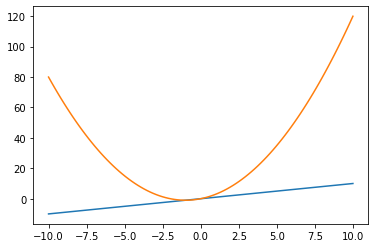

In [137]:
plt.plot(a.detach().numpy(),a.detach().numpy())
plt.plot(a.detach().numpy(),b.detach().numpy())